In [1]:
import pandas as pd
import numpy as np
df_doc = pd.read_csv('data_univ/insertion-professionnelle-des-diplomes-de-doctorat-par-ensemble.csv', delimiter=';' )
df_mas = pd.read_csv('data_univ/fr-esr-insertion_professionnelle-master.csv', delimiter=';')
df_lp = pd.read_csv('data_univ/fr-esr-insertion_professionnelle-lp.csv', delimiter=';')
df_dut = pd.read_csv('data_univ/fr-esr-insertion_professionnelle-dut_donnees_nationales.csv', delimiter=';')

In [2]:
# df_lp.describe();
df_lp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6038 entries, 0 to 6037
Data columns (total 32 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Annee                                             6038 non-null   int64  
 1   Diplôme                                           6038 non-null   object 
 2   Numéro de l'établissement                         6038 non-null   object 
 3   Établissement                                     6038 non-null   object 
 4   Code de l'académie                                5902 non-null   object 
 5   Académie                                          5902 non-null   object 
 6   Code du domaine                                   6038 non-null   object 
 7   Domaine                                           6038 non-null   object 
 8   Code de la discipline                             6038 non-null   object 
 9   Discipline         

In [5]:
# c_lp

In [1]:
# # df_lp['Remarque'].value_counts()
# remarks = list(df_lp['Remarque'].value_counts().index)
# df_lp.loc[(df_lp['Taux d’insertion'] != 'ns') & df_lp['Remarque'].isna(), ['Remarque']]

In [6]:
# df_lp['Code de l\'académie'].value_counts()

In [267]:
df_lp_18 = df_lp.loc[(df_lp['Taux d’insertion'] != 'ns') & df_lp['Remarque'].isna() & (df_lp['situation'] == '18 mois après le diplôme') & (df_jobs_18['Taux d’insertion'] != 'nd'), 
          ['Annee', 'Académie', 'Code du domaine', 'Domaine',
       'Discipline', 'situation', 'Remarque',
       'Nombre de réponses', 'Taux de réponse', 'Poids de la discipline',
       'Taux d’insertion', '% emplois cadre ou professions intermédiaires',
       '% emplois stables', '% emplois à temps plein',
       'Salaire net médian des emplois à temps plein',
       'Salaire brut annuel estimé',
       'Taux de chômage régional', 'Salaire net mensuel médian régional',
       '% emplois cadre', '% emplois extérieurs à la région de l’université',
       '% femmes', 'Salaire net mensuel régional 1er quartile',
       'Salaire net mensuel régional 3ème quartile']]
df_lp_30 = df_lp.loc[(df_lp['Taux d’insertion'] != 'ns') & (df_lp['Remarque'].isna()) & (df_lp['situation'] == '30 mois après le diplôme') & (df_jobs_18['Taux d’insertion'] != 'nd'), 
          ['Annee', 'Académie', 'Code du domaine', 'Domaine',
       'Discipline', 'situation', 'Remarque',
       'Nombre de réponses', 'Taux de réponse', 'Poids de la discipline',
       'Taux d’insertion', '% emplois cadre ou professions intermédiaires',
       '% emplois stables', '% emplois à temps plein',
       'Salaire net médian des emplois à temps plein',
       'Salaire brut annuel estimé',
       'Taux de chômage régional', 'Salaire net mensuel médian régional',
       '% emplois cadre', '% emplois extérieurs à la région de l’université',
       '% femmes', 'Salaire net mensuel régional 1er quartile',
       'Salaire net mensuel régional 3ème quartile']]

In [9]:
df_lp_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2279 entries, 0 to 6037
Data columns (total 32 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Annee                                             2279 non-null   int64  
 1   Diplôme                                           2279 non-null   object 
 2   Numéro de l'établissement                         2279 non-null   object 
 3   Établissement                                     2279 non-null   object 
 4   Code de l'académie                                2146 non-null   object 
 5   Académie                                          2146 non-null   object 
 6   Code du domaine                                   2279 non-null   object 
 7   Domaine                                           2279 non-null   object 
 8   Code de la discipline                             2279 non-null   object 
 9   Discipline         

In [2]:
import functions as f
cols_to_clean = [15, 16, 17, 18, 19, 20, 22, 23, 24, 25, 27, 28]
cols_dtype = float
def cleaning_procedure(df, cols_to_clean, cols_dtype):
    df_new = df
    df_new = f.remove_ns_rows(df_new)
    df_new = f.keep_rows_without_remarks(df_new)
    df_new = f.substitute_ns_nd_to_nan(df_new, cols_to_clean, d_type=cols_dtype)
    return df_new

In [3]:
df_lp = cleaning_procedure(df_lp, cols_to_clean, cols_dtype)

In [312]:
# lp_18_grouped_years_discipline = df_lp_18.groupby(['Annee','Domaine'])
# df_lp_18.set_index(['Annee','Domaine'])

Académie Code du domaine  \
Annee Domaine                                                          
2013  Droit, économie et gestion                Nice             DEG   
      Sciences, technologies et santé           Nice             STS   
      Sciences, technologies et santé  Aix-Marseille             STS   
      Sciences, technologies et santé  Aix-Marseille             STS   
      Sciences, technologies et santé       Poitiers             STS   
...                                              ...             ...   
2016  Sciences, technologies et santé       Poitiers             STS   
      Droit, économie et gestion          Versailles             DEG   
      Sciences, technologies et santé        Créteil             STS   
      Sciences, technologies et santé        Créteil             STS   
      Sciences, technologies et santé     Versailles             STS   

                                                                              Discipline  \
Annee Domaine                                                                              
2013  Droit, économie et gestion                                                 Gestion   
      Sciences, technologies et santé           Ensemble sciences, technologies et santé   
      Sciences, technologies et santé           Ensemble sciences, technologies et santé   
      Sciences, technologies et santé                             Sciences fondamentales   
      Sciences, technologies et santé           Ensemble sciences, technologies et santé   
...                                                                                  ...   
2016  Sciences, technologies et santé           Ensemble sciences, technologies et santé   
      Droit, économie et gestion       Ensemble formations juridiques, économiques et...   
      Sciences, technologies et santé           Ensemble sciences, technologies et santé   
      Sciences, technologies et santé                                       Informatique   
      Sciences, technologies et santé                            Sciences de l'ingénieur   

                                                      situation Remarque  \
Annee Domaine                                                              
2013  Droit, économie et gestion       18 mois après le diplôme      NaN   
      Sciences, technologies et santé  18 mois après le diplôme      NaN   
      Sciences, technologies et santé  18 mois après le diplôme      NaN   
      Sciences, technologies et santé  18 mois après le diplôme      NaN   
      Sciences, technologies et santé  18 mois après le diplôme      NaN   
...                                                         ...      ...   
2016  Sciences, technologies et santé  18 mois après le diplôme      NaN   
      Droit, économie et gestion       18 mois après le diplôme      NaN   
      Sciences, technologies et santé  18 mois après le diplôme      NaN   
      Sciences, technologies et santé  18 mois après le diplôme      NaN   
      Sciences, technologies et santé  18 mois après le diplôme      NaN   

                                       Nombre de réponses  Taux de réponse  \
Annee Domaine                                                                
2013  Droit, économie et gestion                       85             74.0   
      Sciences, technologies et santé                 105             84.0   
      Sciences, technologies et santé                 259             76.0   
      Sciences, technologies et santé                  40             78.0   
      Sciences, technologies et santé                 116             73.0   
...                                                   ...              ...   
2016  Sciences, technologies et santé                 148             68.0   
      Droit, économie et gestion                       90             71.0   
      Sciences, technologies et santé                 147             66.0   
      Sciences, technologies et santé                  36      

In [313]:
# for key in lp_18_grouped_years_discipline.indices.keys():
#     print(key[0], key[1])

2013 Droit, économie et gestion
2013 Lettres, langues, arts
2013 Sciences humaines et sociales
2013 Sciences, technologies et santé
2014 Droit, économie et gestion
2014 Lettres, langues, arts
2014 Sciences humaines et sociales
2014 Sciences, technologies et santé
2015 Droit, économie et gestion
2015 Lettres, langues, arts
2015 Sciences humaines et sociales
2015 Sciences, technologies et santé
2016 Droit, économie et gestion
2016 Lettres, langues, arts
2016 Sciences humaines et sociales
2016 Sciences, technologies et santé


### How many people got their jobs across domains.

In [292]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

# sns.boxplot(x="day", y="total_bill",
#             hue="smoker", palette=["m", "g"],
#             data=tips)
# sns.despine(offset=10, trim=True)

# ax = sns.stripplot(x="Annee", y="Salaire net médian des emplois à temps plein", hue="Domaine",
#                    data=lp_18_grouped_years_discipline.mean(), palette="Set2", dodge=True)

In [288]:
df_jobs_18 = df_lp_18[['Annee', 'Domaine',
       'Nombre de réponses', 'Taux de réponse',
       'Taux d’insertion', '% emplois cadre ou professions intermédiaires',
       '% emplois stables', '% emplois à temps plein',
       '% emplois cadre', '% emplois extérieurs à la région de l’université',
       '% femmes']]

In [306]:
years = np.unique(df_jobs_18['Annee'])
domains = np.unique(df_jobs_18['Domaine'])

In [292]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

# sns.boxplot(x="day", y="total_bill",
#             hue="smoker", palette=["m", "g"],
#             data=tips)
# sns.despine(offset=10, trim=True)

# ax = sns.stripplot(x="Annee", y="Salaire net médian des emplois à temps plein", hue="Domaine",
#                    data=lp_18_grouped_years_discipline.mean(), palette="Set2", dodge=True)

In [ ]:
data = [data, d2, d2[::2, 0]]
fig7, ax7 = plt.subplots()
ax7.set_title('Multiple Samples with Different sizes')
ax7.boxplot(data)

plt.show()

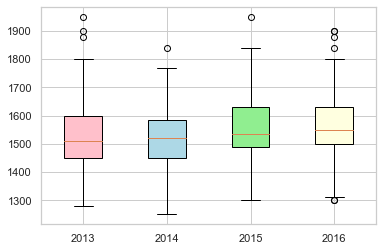

In [363]:
years
df_sals = [df_lp_18[(df_lp_18['Annee'] == year) & (df_lp_18['Salaire net médian des emplois à temps plein'] != 'ns')]['Salaire net médian des emplois à temps plein'].astype(int) for year in years]

bplot = plt.boxplot(x=df_sals, labels=years, patch_artist=True)
# plt.xlabel()


colors = ['pink', 'lightblue', 'lightgreen', 'lightyellow']

for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)

plt.show()

In [361]:
tips = sns.load_dataset("tips")

In [362]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [370]:
# ax = sns.boxplot(x="Annee", y='Salaire net médian des emplois à temps plein', hue="Domaine",
#                  data=df_lp_18, palette="Set3")

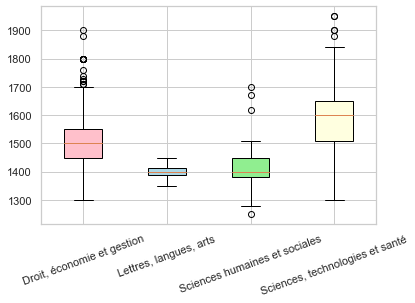

In [369]:
domains
df_sals = [df_lp_18[(df_lp_18['Domaine'] == domain) & (df_lp_18['Salaire net médian des emplois à temps plein'] != 'ns')]['Salaire net médian des emplois à temps plein'].astype(int) for domain in domains]

bplot = plt.boxplot(x=df_sals, labels=domains, patch_artist=True, )
# plt.xlabel()

plt.xticks(rotation=20)

colors = ['pink', 'lightblue', 'lightgreen', 'lightyellow']

for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)

plt.show()

In [373]:
df_jobs_18['Taux d’insertion'] = df_jobs_18['Taux d’insertion'].astype(int);
df_jobs_18['N active'] = df_jobs_18['Taux d’insertion']  * df_jobs_18['Nombre de réponses'] / 100;
df_jobs_18['N active'] = df_jobs_18['N active'].astype(int)

/Users/dilkinn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/dilkinn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [379]:
df_act_18 = df_jobs_18[['Annee', 'Domaine', 'N active']].groupby(by = ['Annee', 'Domaine']).sum() # N active represents number of people who got their jobs.
df_act_18['N responses'] = df_jobs_18[['Annee', 'Domaine', 'Taux d’insertion']].groupby(by = ['Annee', 'Domaine']).sum()
df_act_18['rate active/responses'] = df_act_18['N active'] / df_act_18['N responses']

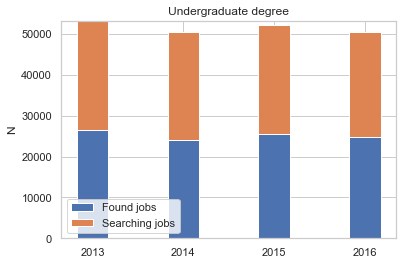

In [391]:
df_act_18 = df_jobs_18[['Annee', 'N active']].groupby(by = ['Annee']).sum() # N active represents number of people who got their jobs.
df_act_18['N responses'] = df_jobs_18[['Annee', 'Taux d’insertion']].groupby(by = ['Annee']).sum()
df_act_18['rate active/responses'] = df_act_18['N active'] / df_act_18['N responses']

width = 0.35
p1 = plt.bar(df_act_18.index, df_act_18['N active'], width, label='Found jobs') #, yerr=menStd
p2 = plt.bar(df_act_18.index, df_act_18['N responses'] - df_act_18['N active'], width, bottom=df_act_18['N active'], label='Searching jobs')
#              bottom=menMeans, yerr=womenStd)

plt.ylabel('N')
plt.title('Undergraduate degree')
plt.xticks(df_act_18.index)
plt.legend()
# plt.yticks(np.arange(0, 81, 10))
# plt.legend((p1[0], p2[0]), ('Men', 'Women'))

plt.show()

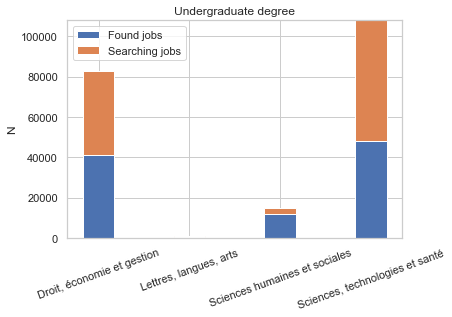

In [403]:
gr_col = 'Domaine'

df_act_18 = df_jobs_18[[gr_col, 'N active']].groupby(by = [gr_col]).sum() # N active represents number of people who got their jobs.
df_act_18['N responses'] = df_jobs_18[[gr_col, 'Taux d’insertion']].groupby(by = [gr_col]).sum()
df_act_18['rate active/responses'] = df_act_18['N active'] / df_act_18['N responses']

width = 0.35
p1 = plt.bar(df_act_18.index, df_act_18['N active'], width, label='Found jobs') #, yerr=menStd
p2 = plt.bar(df_act_18.index, df_act_18['N responses'] - df_act_18['N active'], width, bottom=df_act_18['N active'], label='Searching jobs')
#              bottom=menMeans, yerr=womenStd)

plt.ylabel('N')
plt.title('Undergraduate degree')
plt.xticks(df_act_18.index, rotation=20)
plt.legend()
# plt.yticks(np.arange(0, 81, 10))
# plt.legend((p1[0], p2[0]), ('Men', 'Women'))

plt.show()

In [399]:
df_act_18

,N active,N responses,rate active/responses
Domaine,,,
"Droit, économie et gestion",83003,41140,2.017574
"Lettres, langues, arts",839,328,2.557927
Sciences humaines et sociales,14836,11846,1.252406
"Sciences, technologies et santé",107858,47853,2.253944


## Best universities

In [408]:
# top 20 uniersities rank
best_universities = [['Université Paris Sud (Paris 11)', [37, 42, 41]],
['Sorbonne Université', [44	36	40]],
['École normale supérieure (ENS ULM)', [79,64,69]],
['Aix-Marseille Université', [101-150,101-150,101-150]],
['Université Grenoble Alpes', [101-150,151–199,151–200]],
['Université de Strasbourg', [101-150,101-150,101-150]],
['Université Paris-Diderot (Paris 7)', [101-150,101-150,101-150]],
['Université de Montpellier' , [151–200 ,201-300,201-300]],
['Université Paris-Descartes (Paris 5)', [151–200 ,151–199,151–200]],
['Université Claude-Bernard (Lyon 1)', [201-300,201-300,201-300]],
['Université Paul-Sabatier (Toulouse 3)', [201-300,201-300,201-300]],
['Université de Bordeaux' , [201-300,201-300,151-200]],
['Université Toulouse 1', [201-300,201-300,301-400]],
['École normale supérieure Lyon',[301-400,301-400,201-300]],
['École Polytechnique', [301-400,401-500,401-500]],
['ESPCI Paris Tech', [301-400,301-400,301-400]],
['Université Paris Dauphine (Paris 9)', [301-400,301-400,301-400]],
['Université de Lille', [301-400,np.nan,np.nan]],
['Université de Lorraine', [301-400, 201-300, 201-300]]
]

In [21]:
df_est = df_lp_test.loc[:,['Établissement', 'Académie', 'Taux d’insertion']].groupby(by=['Établissement', 'Académie']).mean()

In [22]:
df_est

,,Taux d’insertion
Établissement,Académie,
Aix-Marseille,Aix-Marseille,90.534247
Amiens - Picardie Jules-Verne,Amiens,90.666667
Angers,Nantes,91.250000
Antilles,Guadeloupe,NaN
Artois,Lille,91.911765
...,...,...
Toulouse 3 - Paul Sabatier,Toulouse,90.824561
Tours,Orléans-Tours,89.423077
Université Polytechnique Hauts-de-France,Lille,92.918919


In [25]:
import folium
from folium import plugins
import matplotlib as plt

In [4]:
m = folium.Map(location=[47.0000, 2.0000], zoom_start=5.0, width=500, height=500)
m;

NameError: name 'folium' is not defined

In [ ]:
deps_geo = 'data_univ/departements.geojson'

folium.Choropleth(
    geo_data=deps_geo,
    name='choropleth',
    data=state_data,
    columns=['Académie', 'Taux d’insertion'],
    key_on='feature.id',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Unemployment Rate (%)'
).add_to(m)

folium.LayerControl().add_to(m)

In [56]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="test_name")
location = geolocator.geocode("Paris")
print(location.address)
print((location.latitude, location.longitude))
print(location.raw)

Paris, Île-de-France, France métropolitaine, France
(48.8566969, 2.3514616)
{'place_id': 234423737, 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright', 'osm_type': 'relation', 'osm_id': 7444, 'boundingbox': ['48.8155755', '48.902156', '2.224122', '2.4697602'], 'lat': '48.8566969', 'lon': '2.3514616', 'display_name': 'Paris, Île-de-France, France métropolitaine, France', 'class': 'boundary', 'type': 'administrative', 'importance': 0.9417101715588673, 'icon': 'https://nominatim.openstreetmap.org/images/mapicons/poi_boundary_administrative.p.20.png'}


In [57]:
df_lp_test['Académie'].value_counts()

Lille               184
Nantes              157
Rennes              154
Toulouse            145
Lyon                134
Bordeaux            119
Créteil             112
Grenoble            102
Versailles           98
Strasbourg           95
Montpellier          85
Orléans-Tours        84
Clermont-Ferrand     77
Aix-Marseille        77
Nancy-Metz           70
Poitiers             67
Nice                 64
Reims                54
Caen                 54
Besançon             50
Paris                43
Rouen                39
Dijon                29
Limoges              22
Amiens               21
Corse                 6
Guadeloupe            4
Name: Académie, dtype: int64

## Code de l'etablissement

In [8]:
df_lp['Numéro de l\'établissement'].value_counts()

UNIV        133
0134009M     73
0542493S     70
0490970N     64
0440984F     62
           ... 
0301687W      6
0755890V      6
0840685N      4
9710585J      4
0751723R      1
Name: Numéro de l'établissement, Length: 65, dtype: int64

In [10]:
univ_names = pd.read_csv('data_univ/fr-esr-principaux-etablissements-enseignement-superieur.csv', delimiter=";")

In [13]:
univ_names.head(5)

,uai - identifiant,Libellé,sigle,type d'établissement,Secteur d'établissement,Établissements d'enseignement supérieur accrédités à délivrer le doctorat,localisation,Site internet,Géolocalisation,siret,...,Site internet en chinois,Site internet en espagnol,Site internet en allemand,Site internet en italien,Identifiant interne,Anciens codes uai,Identifiant dataESR,article,universités fusionnées,Vague contractuelle
0,0312561R,"Centre de ressources, d'expertise et de perfor...",CREPS Toulouse,École,Public,NaN,Occitanie>Toulouse>Haute-Garonne>Toulouse,https://www.creps-toulouse-midi-pyrenees.jeune...,"48.887566,2.169179",1.931010e+13,...,NaN,NaN,NaN,NaN,YgZl6,NaN,NaN,au,NaN,NaN
1,0511931X,Centre national des arts du cirque,CNAC,École,Privé,NaN,Grand Est>Reims>Marne>Châlons-en-Champagne,https://www.cnac.fr/,"48.95119,4.36256",3.413725e+13,...,NaN,https://www.cnac.fr/article/1206,NaN,NaN,vLcx0,NaN,NaN,au,NaN,NaN
2,0753480A,Collège de France,NaN,Grand établissement,Public,NaN,Île-de-France>Paris>Paris 5e,http://www.college-de-france.fr/,"48.8491,2.34553",1.975348e+13,...,NaN,NaN,NaN,NaN,0Mvk5,NaN,NaN,au,NaN,Vague D
3,0753495S,Conservatoire national supérieur de musique et...,CNSMDP,École,Public,NaN,Île-de-France>Paris>Paris 19e,http://www.conservatoiredeparis.fr/accueil/,"48.88882,2.39076",1.975350e+13,...,NaN,NaN,NaN,NaN,ZCW24,NaN,NaN,au,NaN,NaN
4,0951819L,ECAM-EPMI,ECAM-EPMI,École,Privé,NaN,Île-de-France>Versailles>Val-d'Oise>Paris>Cergy,http://www.epmi.fr/,"49.031566,2.075172",3.889645e+13,...,NaN,NaN,NaN,NaN,Onzi5,NaN,NaN,à l',NaN,NaN
